In [1]:
# Import necessary libraries
import torch
import torch.optim as optim
import torch.nn as nn

# Import your ResNet models and utility functions
from models.resnet import resnet18  # Import ResNet-18 model
from utils.training import train_model  # Import the train_model function
from utils.visualization import plot_metrics  # Assuming you have a function to plot metrics
from utils.dataset import get_CIFAR_10  # Import the get_CIFAR_10 function to load data

# Import the evaluation function
from utils.evaluation import evaluate_model

In [2]:
# Check if GPU is available and set the device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")
print(torch.cuda.get_device_name(0) if torch.cuda.is_available() else "No GPU detected")

Using device: cuda
NVIDIA GeForce RTX 3060


In [3]:
# Load CIFAR-10 training and validation datasets using the dataset.py function
# Set augmentation to 'resnet' for ResNet models
train_loader, val_loader = get_CIFAR_10(batch_size=256, num_workers=15, agumentation='resnet')

Files already downloaded and verified
Files already downloaded and verified


In [4]:
# Initialize the ResNet-18 model with shortcut type 'B' (projection shortcuts for increasing dimensions)
model = resnet18(num_classes=10, shortcut_type='B').to(device)

# Define the loss function
criterion = nn.CrossEntropyLoss()

# Define the optimizer with SGD, weight decay, and momentum
optimizer = optim.SGD(model.parameters(), lr=0.1, momentum=0.9, weight_decay=0.0001)

# Define a learning rate scheduler that reduces the learning rate by 10 when the training loss plateaus
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=10)

# Number of epochs to achieve the required number of iterations (60 × 10^4)
num_iterations = 60 * 10**4
num_epochs = num_iterations // len(train_loader)
print(f"Training for approximately {num_epochs} epochs to reach {num_iterations} iterations.")

Training for approximately 3061 epochs to reach 600000 iterations.


In [5]:
# Train the model with the specified hyperparameters
train_model(model, train_loader, criterion, optimizer, device, num_epochs=1, scheduler=scheduler, save_path='resnet18_model.pth')

Tracking training loss: 2.432093381881714
Tracking training accuracy: 0.08203125
Tracking training loss: 3.270697832107544
Tracking training accuracy: 0.1328125
Tracking training loss: 3.320528984069824
Tracking training accuracy: 0.10546875
Tracking training loss: 3.796680450439453
Tracking training accuracy: 0.15234375
Tracking training loss: 4.660611629486084
Tracking training accuracy: 0.12109375
Tracking training loss: 5.572832107543945
Tracking training accuracy: 0.12109375
Tracking training loss: 5.034789085388184
Tracking training accuracy: 0.13671875
Tracking training loss: 3.3873214721679688
Tracking training accuracy: 0.1640625
Tracking training loss: 3.0715606212615967
Tracking training accuracy: 0.0703125
Tracking training loss: 3.246893882751465
Tracking training accuracy: 0.07421875
Tracking training loss: 3.4422292709350586
Tracking training accuracy: 0.09375
Tracking training loss: 2.616241931915283
Tracking training accuracy: 0.06640625
Tracking training loss: 2.56451

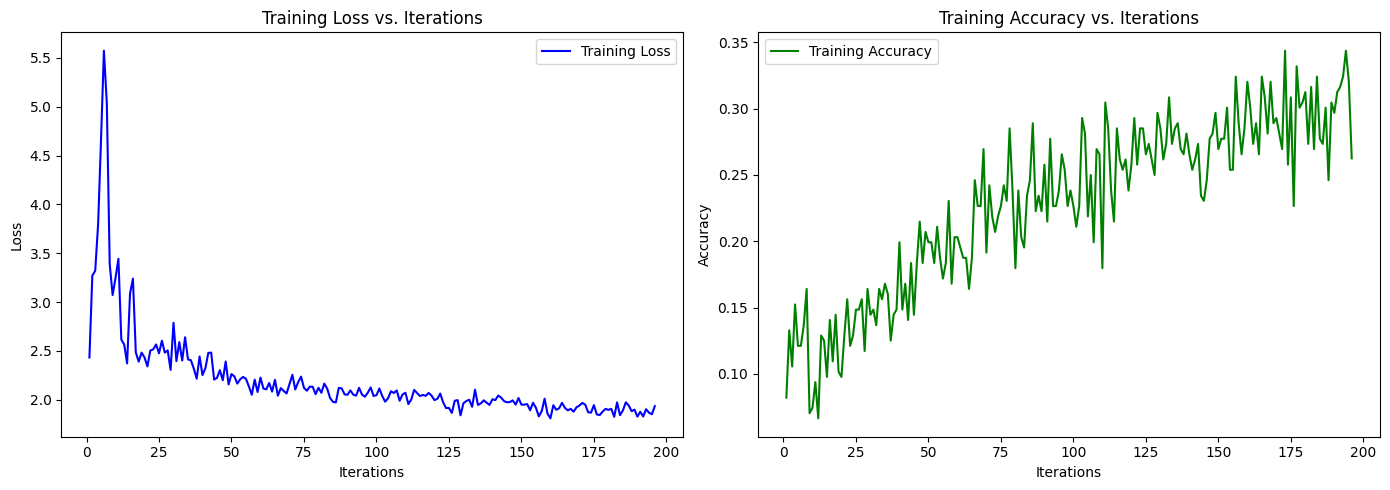

In [6]:
# Retrieve tracked metrics and plot them
metrics = model.get_metrics_per_iteration()
plot_metrics(metrics)

### Evaluating the Model on the Validation Set
Now that the model is trained, let's evaluate its performance on the validation (test) set to see how well it generalizes to unseen data.

In [7]:
# Define the loss function for evaluation
criterion = nn.CrossEntropyLoss()

# Evaluate the model on the validation set
evaluation_metrics = evaluate_model(model, val_loader, criterion, device)
print(f"Validation Loss: {evaluation_metrics['loss']:.4f}, Validation Accuracy: {evaluation_metrics['accuracy']:.4f}")

Evaluation - Loss: 1.8975, Accuracy: 0.3022
Validation Loss: 1.8975, Validation Accuracy: 0.3022
